Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 26s 147ms/step - accuracy: 0.5306 - loss: 0.8822 - val_accuracy: 0.8384 - val_loss: 0.3949
Epoch 2/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.7842 - loss: 0.4999 - val_accuracy: 0.7549 - val_loss: 0.5191
Epoch 3/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.7879 - loss: 0.5010 - val_accuracy: 0.8455 - val_loss: 0.3491
Epoch 4/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.8369 - loss: 0.3858 - val_accuracy: 0.8659 - val_loss: 0.3265
Epoch 5/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.8521 - loss: 0.3828 - val_accuracy: 0.8650 - val_loss: 0.3557
Epoch 6/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.8636 - loss: 0.3712 - val_accuracy: 0.7753 - val_loss: 0.4163
Epoch 7/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.8446 - loss: 0.3751 - val_accuracy: 0.8810 - val_loss: 0.3507
Epoch 8/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.8582 - loss: 0.3873 - val_accuracy: 0.8

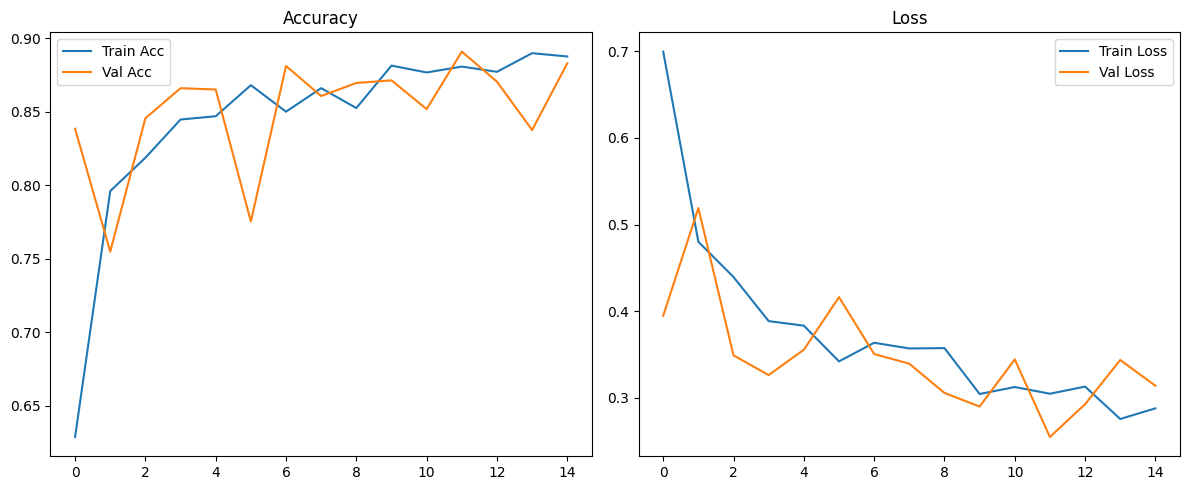

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step
Classification Report:

              precision    recall  f1-score   support

      cloudy       0.97      0.91      0.94       300
      desert       0.90      1.00      0.95       226
  green_area       0.77      0.98      0.86       300
       water       0.97      0.68      0.80       300

    accuracy                           0.88      1126
   macro avg       0.90      0.89      0.88      1126
weighted avg       0.90      0.88      0.88      1126



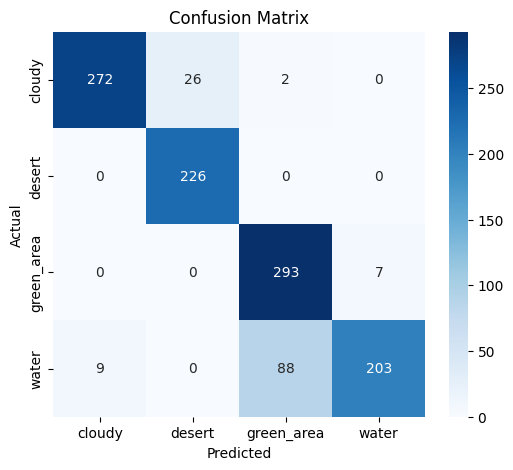

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set the base directory
base_dir = "/kaggle/input/satellite-image/data"

# Parameters
img_height, img_width = 128, 128
batch_size = 32
epochs = 15

# Split data (training: 80%, validation: 20%)
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate model
val_generator.reset()
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=val_generator.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys(), cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
